# Задание
1. Изучить пример, приведенный ниже.
2. Получить свой датасет у преподавателя.
3. Выбрать числовые признаки и таргет в датасете (признаки делаем числовыми или исключаем их).
2. Проанализировать результаты, полученные с помощью statsmodels.
3. Построить регрессионную зависимость (sklearn [тык](https://scikit-learn.ru/user_guide/)) с помощью метода наименьших квадратов, используя вычисление обратной матрицы. 
4. Построить регрессионную зависимость (sklearn) с помощью метода наименьших квадратов, используя метод градиентного спуска. 
4. Сравнить и описать результаты.

# Регрессионный анализ
[Wiki](https://ru.wikipedia.org/wiki/%D0%A0%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%81%D0%B8%D0%BE%D0%BD%D0%BD%D1%8B%D0%B9_%D0%B0%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7)


In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp
import seaborn as sns
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import glob
import warnings
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

warnings.filterwarnings("ignore")
%matplotlib inline

Немного о pandas

[Документация](https://pandas.pydata.org/docs/user_guide/index.html#user-guide) 

[Шпаргалка](https://smysl.io/blog/pandas/) 

[Еще немного](https://blog.skillfactory.ru/kak-nachat-analizirovat-dannye-v-pandas-pervye-shagi/)

[Работа с датой](https://habr.com/ru/company/wunderfund/blog/677068/)

In [79]:
files = glob.glob("datasets/*.csv")
combined = pd.DataFrame()

for file in files:
    data = pd.read_csv(file)
    combined = pd.concat([combined, data])

combined.to_csv('combined_datasets.csv', index=False, sep=',')

In [151]:
df = pd.read_csv('combined_datasets.csv')

df['Date'] = pd.to_datetime(df['Date'])
df['Date'] = df['Date'].astype(np.int64)

df.drop('Name', axis=1, inplace=True)
df.dropna(how='any', axis=1, inplace=True)
print ("Total number of rows in dataset = {}".format(df.shape[0]))
print ("Total number of columns in dataset = {}".format(df.shape[1]))

Total number of rows in dataset = 9920
Total number of columns in dataset = 38


In [152]:
df.head()

,Date,Close,DTB4WK,DTB3,DTB6,DGS5,DGS10,DAAA,DBAA,TE1,...,Nikkei-F,NZD,silver-F,RUSSELL-F,S&P-F,CHF,Dollar index-F,Dollar index,XAG,XAU
0,1262217600000000000,10428.049805,0.04,0.06,0.20,2.69,3.85,5.33,6.39,3.81,...,0.67,0.03,0.26,-1.08,-1.00,-0.11,-0.08,-0.06,0.30,0.39
1,1262563200000000000,10583.959961,0.05,0.08,0.18,2.65,3.85,5.35,6.39,3.80,...,0.31,1.52,3.26,1.61,1.62,-0.57,-0.59,-0.42,3.91,2.10
2,1262649600000000000,10572.019531,0.03,0.07,0.17,2.56,3.77,5.24,6.30,3.74,...,0.47,-0.07,1.96,-0.20,0.31,0.43,0.03,0.12,1.42,-0.12
3,1262736000000000000,10573.679688,0.03,0.06,0.15,2.60,3.85,5.30,6.34,3.82,...,0.19,0.56,2.15,-0.02,0.07,-0.56,-0.24,-0.17,2.25,1.77
4,1262822400000000000,10606.860352,0.02,0.05,0.16,2.62,3.85,5.31,6.33,3.83,...,-0.09,-0.72,0.94,0.50,0.40,0.58,0.58,0.54,0.22,-0.58


In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9920 entries, 0 to 9919
Data columns (total 38 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            9920 non-null   int64  
 1   Close           9920 non-null   float64
 2   DTB4WK          9920 non-null   float64
 3   DTB3            9920 non-null   float64
 4   DTB6            9920 non-null   float64
 5   DGS5            9920 non-null   float64
 6   DGS10           9920 non-null   float64
 7   DAAA            9920 non-null   float64
 8   DBAA            9920 non-null   float64
 9   TE1             9920 non-null   float64
 10  TE2             9920 non-null   float64
 11  TE3             9920 non-null   float64
 12  TE5             9920 non-null   float64
 13  TE6             9920 non-null   float64
 14  DE1             9920 non-null   float64
 15  DE2             9920 non-null   float64
 16  DE4             9920 non-null   float64
 17  DE5             9920 non-null   f

По df.info() видим, что пустых значений нет. RangeIndex: 9920 и Non-Null Count у всех признаков = 9920.


In [154]:
target_col = "XAU"

In [155]:
X = df.loc[:, df.columns != target_col]
y = df.loc[:, target_col]

In [156]:
# Split the data into train and test with 70% data being used for training
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)


# Линейная регрессия (statsmodels)



In [157]:
X_with_constant = sm.add_constant(X_train)
model = sm.OLS(y_train, X_with_constant)

In [158]:
results = model.fit()
results.params

const            -4.869776e-12
Date              1.138499e-20
Close             2.146616e-08
DTB4WK            2.930494e-12
DTB3              3.318974e-12
DTB6              3.852218e-12
DGS5             -1.051830e-12
DGS10            -8.501750e-12
DAAA             -1.193896e-11
DBAA             -1.481600e-11
TE1              -1.143224e-11
TE2              -1.182072e-11
TE3              -1.235397e-11
TE5               3.884803e-13
TE6               9.217243e-13
DE1              -2.877045e-12
DE2              -6.314254e-12
DE4              -1.866822e-11
DE5              -1.813498e-11
DE6              -1.774650e-11
AUD              -3.821397e-13
Brent             6.505013e-14
copper-F         -4.311949e-13
WIT-oil          -8.421178e-14
DJI-F            -9.729073e-14
EUR               6.550938e-14
gold-F           -4.380156e-13
NASDAQ-F         -7.625235e-14
GAS-F             5.627934e-13
Nikkei-F          2.881873e-13
NZD              -4.593200e-13
silver-F         -4.961851e-13
RUSSELL-

In [159]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    XAU   R-squared:                      -0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Thu, 27 Oct 2022   Prob (F-statistic):                nan
Time:                        21:04:03   Log-Likelihood:                -9957.9
No. Observations:                6944   AIC:                         1.992e+04
Df Residuals:                    6943   BIC:                         1.992e+04
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           -4.87e-12   4.89e-10     -0.

1. Коэффициенты регрессии модели Y = b0 + b1∙d1 + b2∙d2 + b3∙d3:



> Intercept = b0 = 2.7089

>b1 = 0.0441
>b2 = 0.1993
>b3 = 0.0069


2. Коэффициент детерминации R-squared = 0.906, его скорректированная оценка Adj. R-squared = 0.903 - это означает, что регрессионная модель объясняет 90% вариации переменной Y.


3. Проверка значимости коэффициента детерминации:

>расчетное значение статистики критерия Фишера: F-statistic = 434,5

>расчетный уровень значимости Prob (F-statistic) = 1.88e-69

>так как значение Prob (F-statistic) < 0.05, то нулевая гипотеза R-squared = 0 НЕ ПРИНИМАЕТСЯ, т.е. коэффициент детерминации ЗНАЧИМ

4. Проверка значимости коэффициентов регрессии:

>расчетный уровень значимости P>|t| для b0, b1, b2 не превышает 0.05 - это означает, что коэффициенты регрессии значимы

>об этом же свидетельствует то, что доверительный интервал для коэффициентов регрессии ([0.025; 0.975]) не включает в себя точку 0

>расчетный уровень значимости P>|t| для b3 превышает 0.05. Нулевая гипотеза не отвергается. b3 не является значимым.
Нулевая гипотеза - коэффициет равен нулю, альтернативная - не равен.

5. значение t для b3 очень мало (чем выше значение t, тем выше шанс, что мы отвергаем нулевую гипотезу).

Также в таблице результатов содержится прочая информация по коэффициентам регрессии: стандартная ошибка Std.Err. 

# Ваше задание
Удаляем признаки, которые не являются значимыми, и повторяем обучение без них.

In [ ]:
X_test = sm.add_constant(X_test)

In [ ]:

y_pred = results.predict(X_test)

In [ ]:
residual = y_test - y_pred

# Предпосылки линейной регрессии
Модель линейной регрессии можно построить не для любых данных, а только для данных, которые удовлетворяют ряду условий. И прежде, чем использовать регрессионное уравнение для прогнозирования, необходимо проверить выполнение этих условий. В ином случае наша модель не будет адекватна поставленной задаче, и ее использование будет бессмысленно.

# Наличие линейной зависимости
Первая и самая естественная предпосылка заключается в линейности модели. Под этим условием подразумевается корректность модели, выбор адекватных предикторов и отсутствие лишних предикторов. А также линейную зависимость целевой переменной от независимых переменных.

In [160]:
sns.pairplot(df)

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x000000004E800940> (for post_execute):


KeyboardInterrupt: 

# Отсутствие мультиколлинеарности

Мультиколлинеарностью называют явление, которое заключается в наличии линейной зависимости между независимыми переменными (предикторами). Такое может возникать, например, при использовании признаков с естественной взаимосвязью: стаж работы и возраст (как правило, чем больше возраст - тем больше стаж и наоборот), количество детских садов и количество школ в районе (обычно детские сады бывают при школе, так что эти количества пропорционально взаимосвязаны) или баллы за экзамены IELTS и TOEFL (так как они экзамены проверяют примерно одни и те же знания и навыки)

Последствием мультиколлинеарности является расширение доверительных интервалов для коэффициентов, и модель получается очень неустойчивой и меняющейся от добавления даже 1-2 новых наблюдений. Разумеется, это не очень хорошая для нас ситуация, поэтому мы должны отбирать для модели только те предикторы, между которыми нет линейной связи.

Для того чтобы проверить данную предпосылку, нам необходимо построить матрицу корреляций для всех потенциальных предикторов, и отследить наличие сильной корреляционной связи. Нет четкой границы, которая отделяет допустимую взаимосвязь и недопустимую, но в ряде источников используется граница в районе 0.9. То есть, если между предикторами коэффициент корреляции по модулю больше, чем 0.9, то мы не можем оба этих предиктора использовать для модели.

Почитать:

[wiki](https://ru.wikipedia.org/wiki/%D0%9C%D1%83%D0%BB%D1%8C%D1%82%D0%B8%D0%BA%D0%BE%D0%BB%D0%BB%D0%B8%D0%BD%D0%B5%D0%B0%D1%80%D0%BD%D0%BE%D1%81%D1%82%D1%8C#:~:text=%D0%9C%D1%83%D0%BB%D1%8C%D1%82%D0%B8%D0%BA%D0%BE%D0%BB%D0%BB%D0%B8%D0%BD%D0%B5%D0%B0%D1%80%D0%BD%D0%BE%D1%81%D1%82%D1%8C%20(multicollinearity)%20%E2%80%94%20%D0%B2%20%D1%8D%D0%BA%D0%BE%D0%BD%D0%BE%D0%BC%D0%B5%D1%82%D1%80%D0%B8%D0%BA%D0%B5,%D0%BD%D0%B0%D0%BB%D0%B8%D1%87%D0%B8%D0%B5%20%D1%81%D0%B8%D0%BB%D1%8C%D0%BD%D0%BE%D0%B9%20%D0%BA%D0%BE%D1%80%D1%80%D0%B5%D0%BB%D1%8F%D1%86%D0%B8%D0%B8%20%D0%BC%D0%B5%D0%B6%D0%B4%D1%83%20%D1%84%D0%B0%D0%BA%D1%82%D0%BE%D1%80%D0%B0%D0%BC%D0%B8)

[статья](https://towardsdatascience.com/why-multicollinearity-isnt-an-issue-in-machine-learning-5c9aa2f1a83a)


In [ ]:
cols_num = ['Feature 1', 'Feature 2', 'Feature 3']

correlation = df.corr().loc[cols_num, cols_num]
correlation

,Feature 1,Feature 2,Feature 3
Feature 1,1.000000,0.054809,0.056648
Feature 2,0.054809,1.000000,0.354104
Feature 3,0.056648,0.354104,1.000000


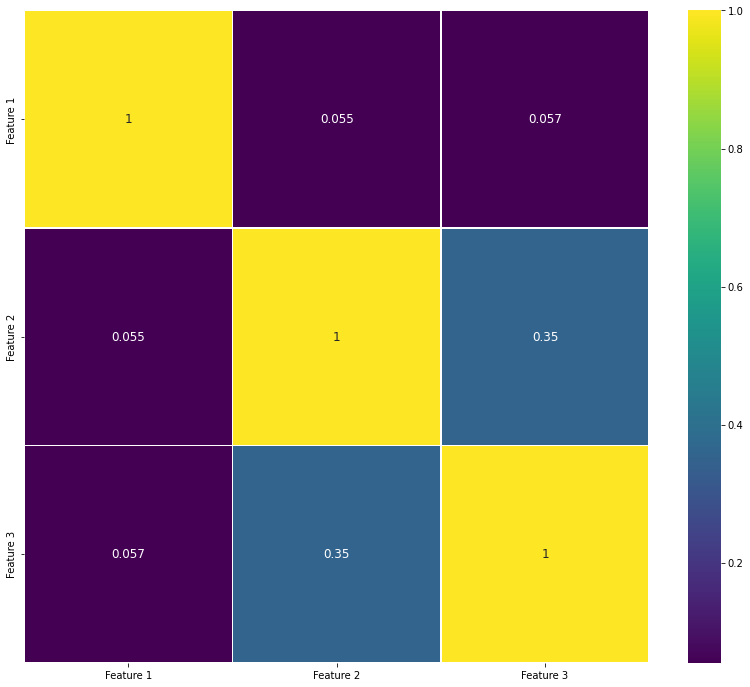

In [ ]:

fig , ax = plt.subplots(figsize = (14,12))

sns.heatmap(correlation, 
            linewidths=0.5, annot=True,cmap='viridis',
            linecolor="white", annot_kws = {'size':12})

Фактор инфляции дисперсии

vif > 10 - выраженная мультиколлинеарность

In [ ]:
vif = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
pd.DataFrame({'vif': vif[0:]}, index=X_train.columns).T

,Feature 1,Feature 2,Feature 3
vif,2.697679,3.473818,3.162643


# Нормальное распределение ошибок
После того как мы построили модель регрессии, мы можем вычислить ошибки (остатки): разницы между реальным значением $y$ и предсказанным $\hat{y}$. Важным условием является нормальность распределения этих ошибок. То есть, распределение остатков должно стремиться к нормальному распределению. Проверить выполняемость этого условия можно визуально с помощью гистограммы или с помощью специальных статистических тестов.

В целом, такое условие связано не напрямую с остатками, а с тем, что зависимая переменная должна быть распределена нормально для любых значений х. Однако такое условие проверить довольно сложно, поэтому можно проверить такое условие с помощью анализа распределения остатков.

In [ ]:
sns.histplot(residual, kde=True, stat="density", linewidth=0)

In [ ]:
fig, ax = plt.subplots(figsize=(6,2.5))
_, (__, ___, r) = sp.stats.probplot(residual, plot=ax, fit=True)

In [ ]:
np.mean(residual)

# Гомоскедастичность 
Гомоскедастичность ошибок заключается в том, что разброс остатков при любых значениях независимых переменных одинаковый. 

Если предположение о гомоскедастичности нарушается, т.е. имеет место гетероскедастичность, это может затруднить интерпретацию результатов регрессии, поскольку в этом случае значение выходной переменной зависит не только от величины изменения входной, но и от того, относительно какой величины это изменение происходит.

Например, если использовать при построении регрессионной модели данные о доходе клиентов, то попытка применить одну модель для богатых и бедных может вызвать проблемы. Действительно, если изменение суммы дохода на 1 000 руб. окажется значимым для клиента с доходом 10 000 руб., то для клиента с доходом 1 000 000 руб. это не так. А регрессионная модель, тем не менее, применяет к ним одну и ту же закономерность. Чтобы этого не произошло, клиентов с низкими и высокими доходами следует разбить на две выборки и таким образом обеспечить гомоскедастичность.

[wiki](https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D0%BC%D0%BE%D1%81%D0%BA%D0%B5%D0%B4%D0%B0%D1%81%D1%82%D0%B8%D1%87%D0%BD%D0%BE%D1%81%D1%82%D1%8C)

In [ ]:
fig, ax = plt.subplots(figsize=(6,2.5))
_ = ax.scatter(y_pred, residual)

# Отсутствие автокорреляции остатков
Автокорреляция остатков (ошибок) возникает в ситуации, когда есть линейная взаимосвязь между остатками для одних значений предикторов и остатками для других значений предикторов. Такое может проявляться в силу естественных причин, как и в случае сс мультиколлинеарностью. Например, если мы предсказываем какие-то показатели для соседних регионов страны, то, скорее всего, они будут сильно взаимосвязаны просто в силу схожести характеристик этих объектов.

Автокорреляция влечет за собой некорректные результаты. Стандартные ошибки получаются несостоятельными, и мы не можем строить корректные доверительные интервалы и проверять гипотезы классическими способами.

[wiki](https://ru.wikipedia.org/wiki/%D0%90%D0%B2%D1%82%D0%BE%D0%BA%D0%BE%D1%80%D1%80%D0%B5%D0%BB%D1%8F%D1%86%D0%B8%D0%BE%D0%BD%D0%BD%D0%B0%D1%8F_%D1%84%D1%83%D0%BD%D0%BA%D1%86%D0%B8%D1%8F)

In [ ]:
acf = smt.graphics.plot_acf(residual, lags=40 , alpha=0.05)
acf.show()


## Матрицами ([статья](https://habr.com/en/post/479398/))

## $\beta^* = (X^T \cdot X)^{-1}\cdot X^T \cdot Y$



In [ ]:
# тут будет код

## Градиентным спуском  ([статья](https://habr.com/en/post/474602/))

Инициализируем случайную точку (часто берут просто нули):

$$
\beta_0 = (0\;\; 0 ...)
$$

Итеративно скачем по линиям уровня нашей функции, шагая каждый раз в сторону антиградиента с корректировкой шага $\eta_k$:

$$
\beta_{k+1} = \beta_k - \eta_{k}\cdot\nabla Q(\beta_k, X)
$$
 
Останавливаемся, когда срабатывает критерий останова. Например:

$$
|\beta_{k+1} - \beta_k| < \xi
$$

Пусть имеем 3 объекта $(X, Y)^i$ = $\left((d_i, 1), Y_i \right)$ с 3 признаками $d_1$, $d_2$ (+ константа). Хотим оценить обычную линейную модель:

$$
a(x) = \beta_1 \cdot d_1 + \beta_2 \cdot d_2 + \beta_0
$$

Тогда функционал ошибки как среднеквадратическая ошибка на нашей выборке выглядит следующим образом:

$$
Q(a, X) = \frac{1}{N}\cdot\sum_{i=1}^N (\beta_1 \cdot d_{i1} + \beta_2 \cdot d_{i2} + \beta_0 - y_i)^2
$$

Посчитаем вектор-градиент по всем оцениваемым параметрам:

$$
\nabla Q(a, X) = (Q'_{\beta_1} \;\;\; Q'_{\beta_2} \;\;\; Q'_{\beta_0})
$$

Пример расчета производной по параметру у признака номер 1:

$$
Q'_{\beta_1} = \frac{2}{N} \cdot \sum_{i=1}^N d_{i1} \cdot (\beta_1 \cdot d_{i1} + \beta_2 \cdot d_{i2} + \beta_0 - y_i)
$$

In [ ]:
# тут будет код

# Тут будет описание

# По материалам
1. https://github.com/bhattbhavesh91/linear-regression-assumptions
2. https://towardsdatascience.com/assumptions-of-linear-regression-fdb71ebeaa8b
3. https://habr.com/en/post/690414/
4. Еще каких-то хороших людей